# Description

This gallery notebook is used to verify that `amp/core/plotting` functions display plots correctly.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Imports

In [2]:
import logging

import matplotlib.pyplot as plt
import numpy as np

import core.config as cconfig
import core.plotting.boxplot as cploboxp
import core.plotting.correlation as cplocorr
import core.plotting.misc_plotting as cplmiplo
import core.plotting.normality as cplonorm
import core.plotting.test.test_plots as cptetepl
import core.plotting.visual_stationarity_test as cpvistte
import dataflow.model.model_plotter as dtfmomoplo
import dataflow.model.test.test_model_evaluator as cdmttme
import helpers.hdbg as hdbg
import helpers.henv as henv
import helpers.hprint as hprint

/app/core/explore.py:39: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tauton


In [3]:
hdbg.init_logger(verbosity=logging.INFO)

_LOG = logging.getLogger(__name__)

_LOG.info("%s", henv.get_system_signature()[0])

hprint.config_notebook()

INFO: > cmd='/venv/lib/python3.9/site-packages/ipykernel_launcher.py -f /home/.local/share/jupyter/runtime/kernel-0bb22d2f-4e8c-46c3-a577-7b15bcc4f74b.json'
(CVXPY) Oct 10 03:46:12 PM: Encountered unexpected exception importing solver GLPK:
ImportError("cannot import name 'glpk' from 'cvxopt' (/venv/lib/python3.9/site-packages/cvxopt/__init__.py)")
(CVXPY) Oct 10 03:46:12 PM: Encountered unexpected exception importing solver GLPK_MI:
ImportError("cannot import name 'glpk' from 'cvxopt' (/venv/lib/python3.9/site-packages/cvxopt/__init__.py)")
INFO  # Git
  branch_name='SorrTask-413-unit-test-plot-projection-from-coreplottingmisc-plottingpy'
  hash='c7e6de76f'
  # Last commits:
    *   c7e6de76f Dylan-Celli Merge branch 'SorrTask-413-unit-test-plot-projection-from-coreplottingmisc-plottingpy' of github.com:sorrentum/sorrentum into SorrTask-413-unit-test-plot-projection-from-coreplottingmisc-plottingpy (   5 weeks ago) Wed Sep 6 12:22:00 2023  (HEAD -> SorrTask-413-unit-test-plot-projecti

# Build config

In [4]:
config = cconfig.get_config_from_env()
if config:
    _LOG.info("Using config from env vars")
else:
    _LOG.info("Using hardwired config")
    config_dict = {"figsize": (20, 10)}
    config = cconfig.Config.from_dict(config_dict)
print(config)

INFO  Using hardwired config
figsize: (20, 10)


# Test data

In [5]:
test_df = cptetepl.Test_plots.get_test_plot_df1()
test_srs = cptetepl.Test_plots.get_test_plot_srs1()

# Plots

## `plot_histograms_and_lagged_scatterplot()`

In [6]:
lag = 7

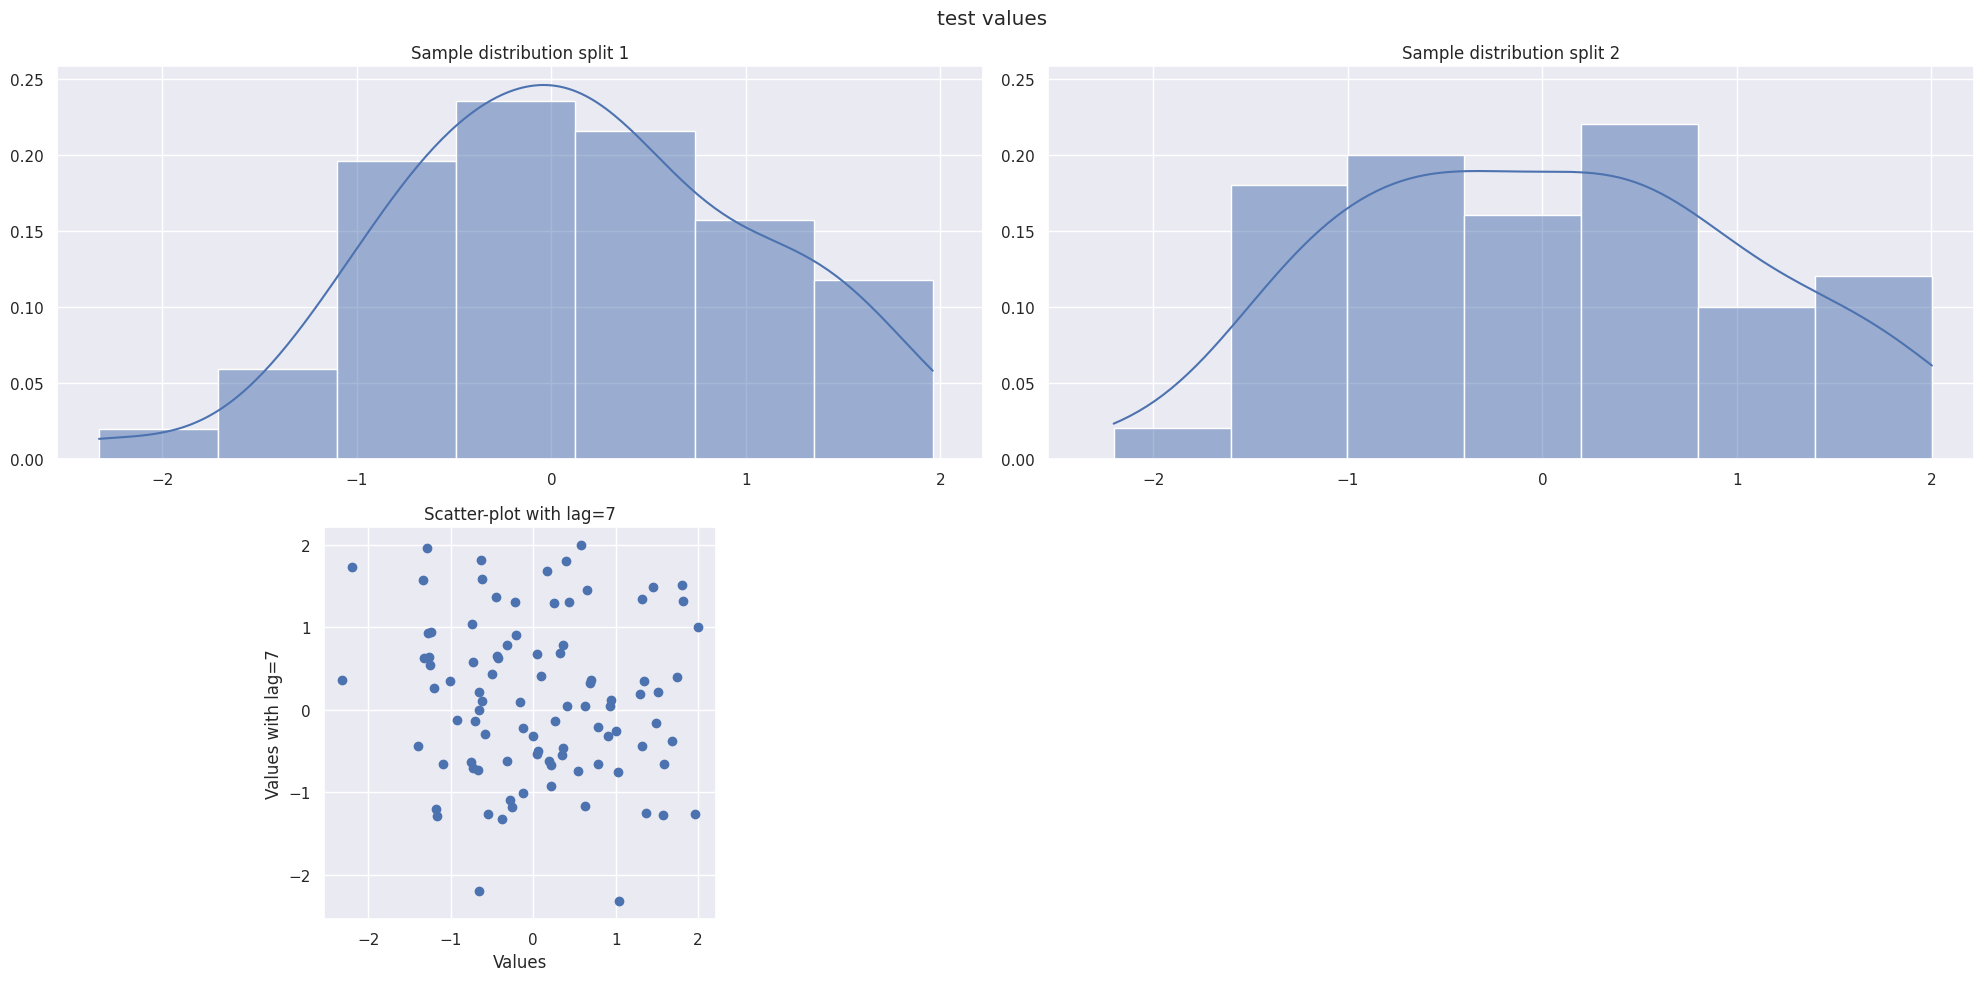

In [7]:
cpvistte.plot_histograms_and_lagged_scatterplot(
    test_srs, lag, figsize=config["figsize"]
)

## `plot_timeseries_distribution()`

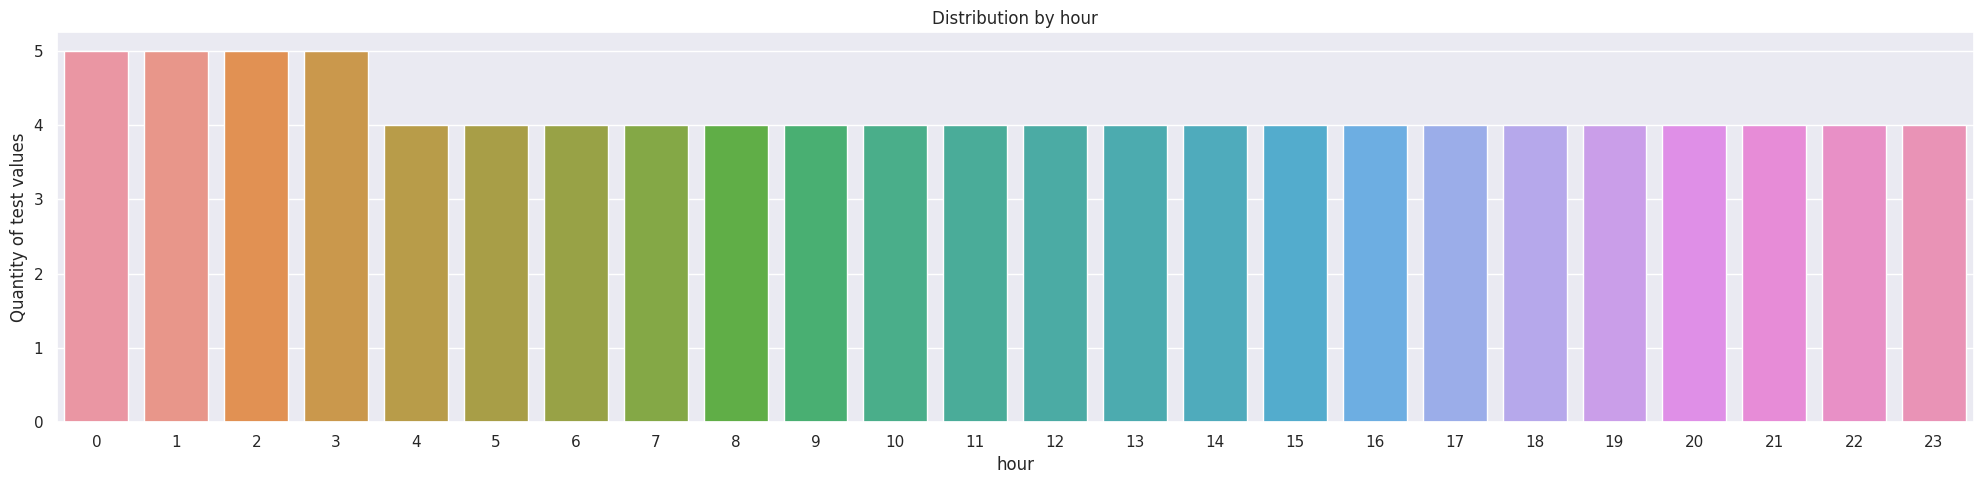

In [8]:
datetime_types = ["hour"]
cplmiplo.plot_timeseries_distribution(test_srs, datetime_types)

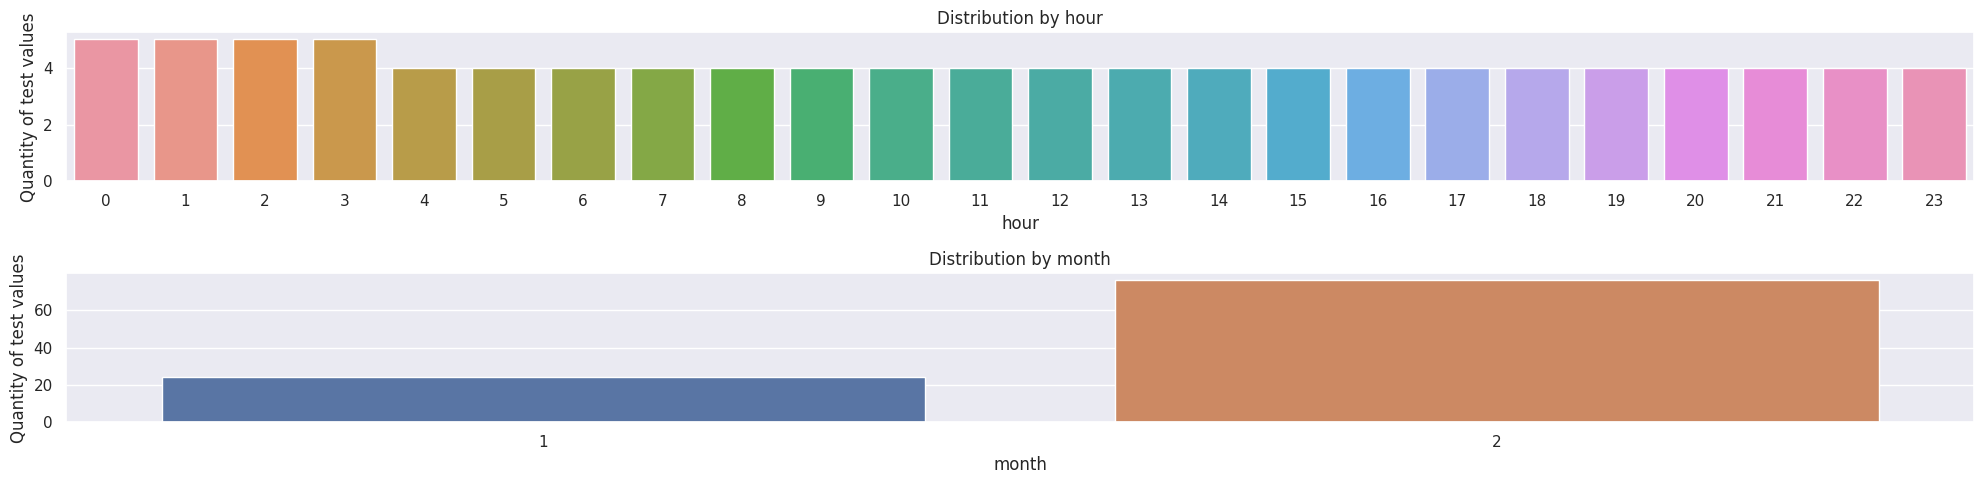

In [9]:
datetime_types = ["hour", "month"]
cplmiplo.plot_timeseries_distribution(test_srs, datetime_types)

## `plot_time_series_by_period()`

/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


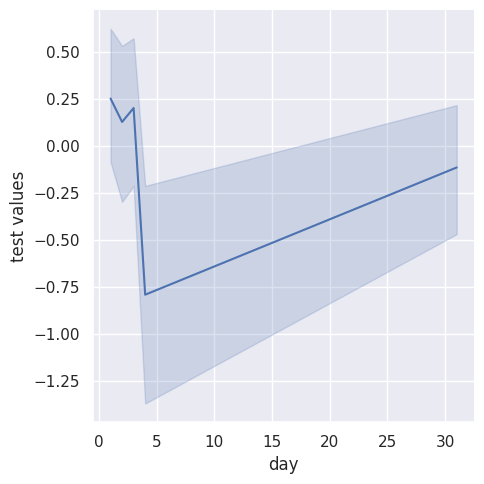

In [10]:
period = "day"
cplmiplo.plot_time_series_by_period(test_srs, period)

/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


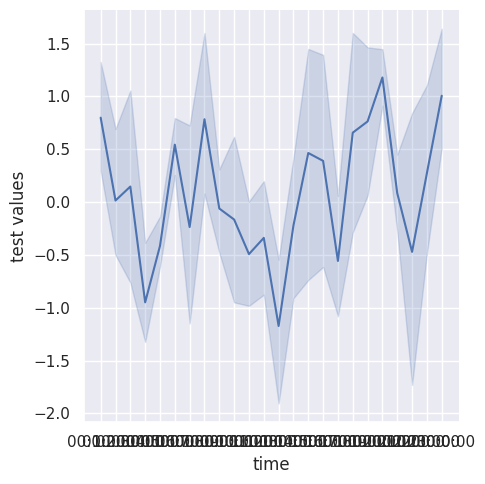

In [11]:
period = "time"
cplmiplo.plot_time_series_by_period(test_srs, period)

## `plot_heatmap()`

In [12]:
mode = "clustermap"

WARNING The corr_df.shape[0]='100' > 20


/venv/lib/python3.9/site-packages/seaborn/matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


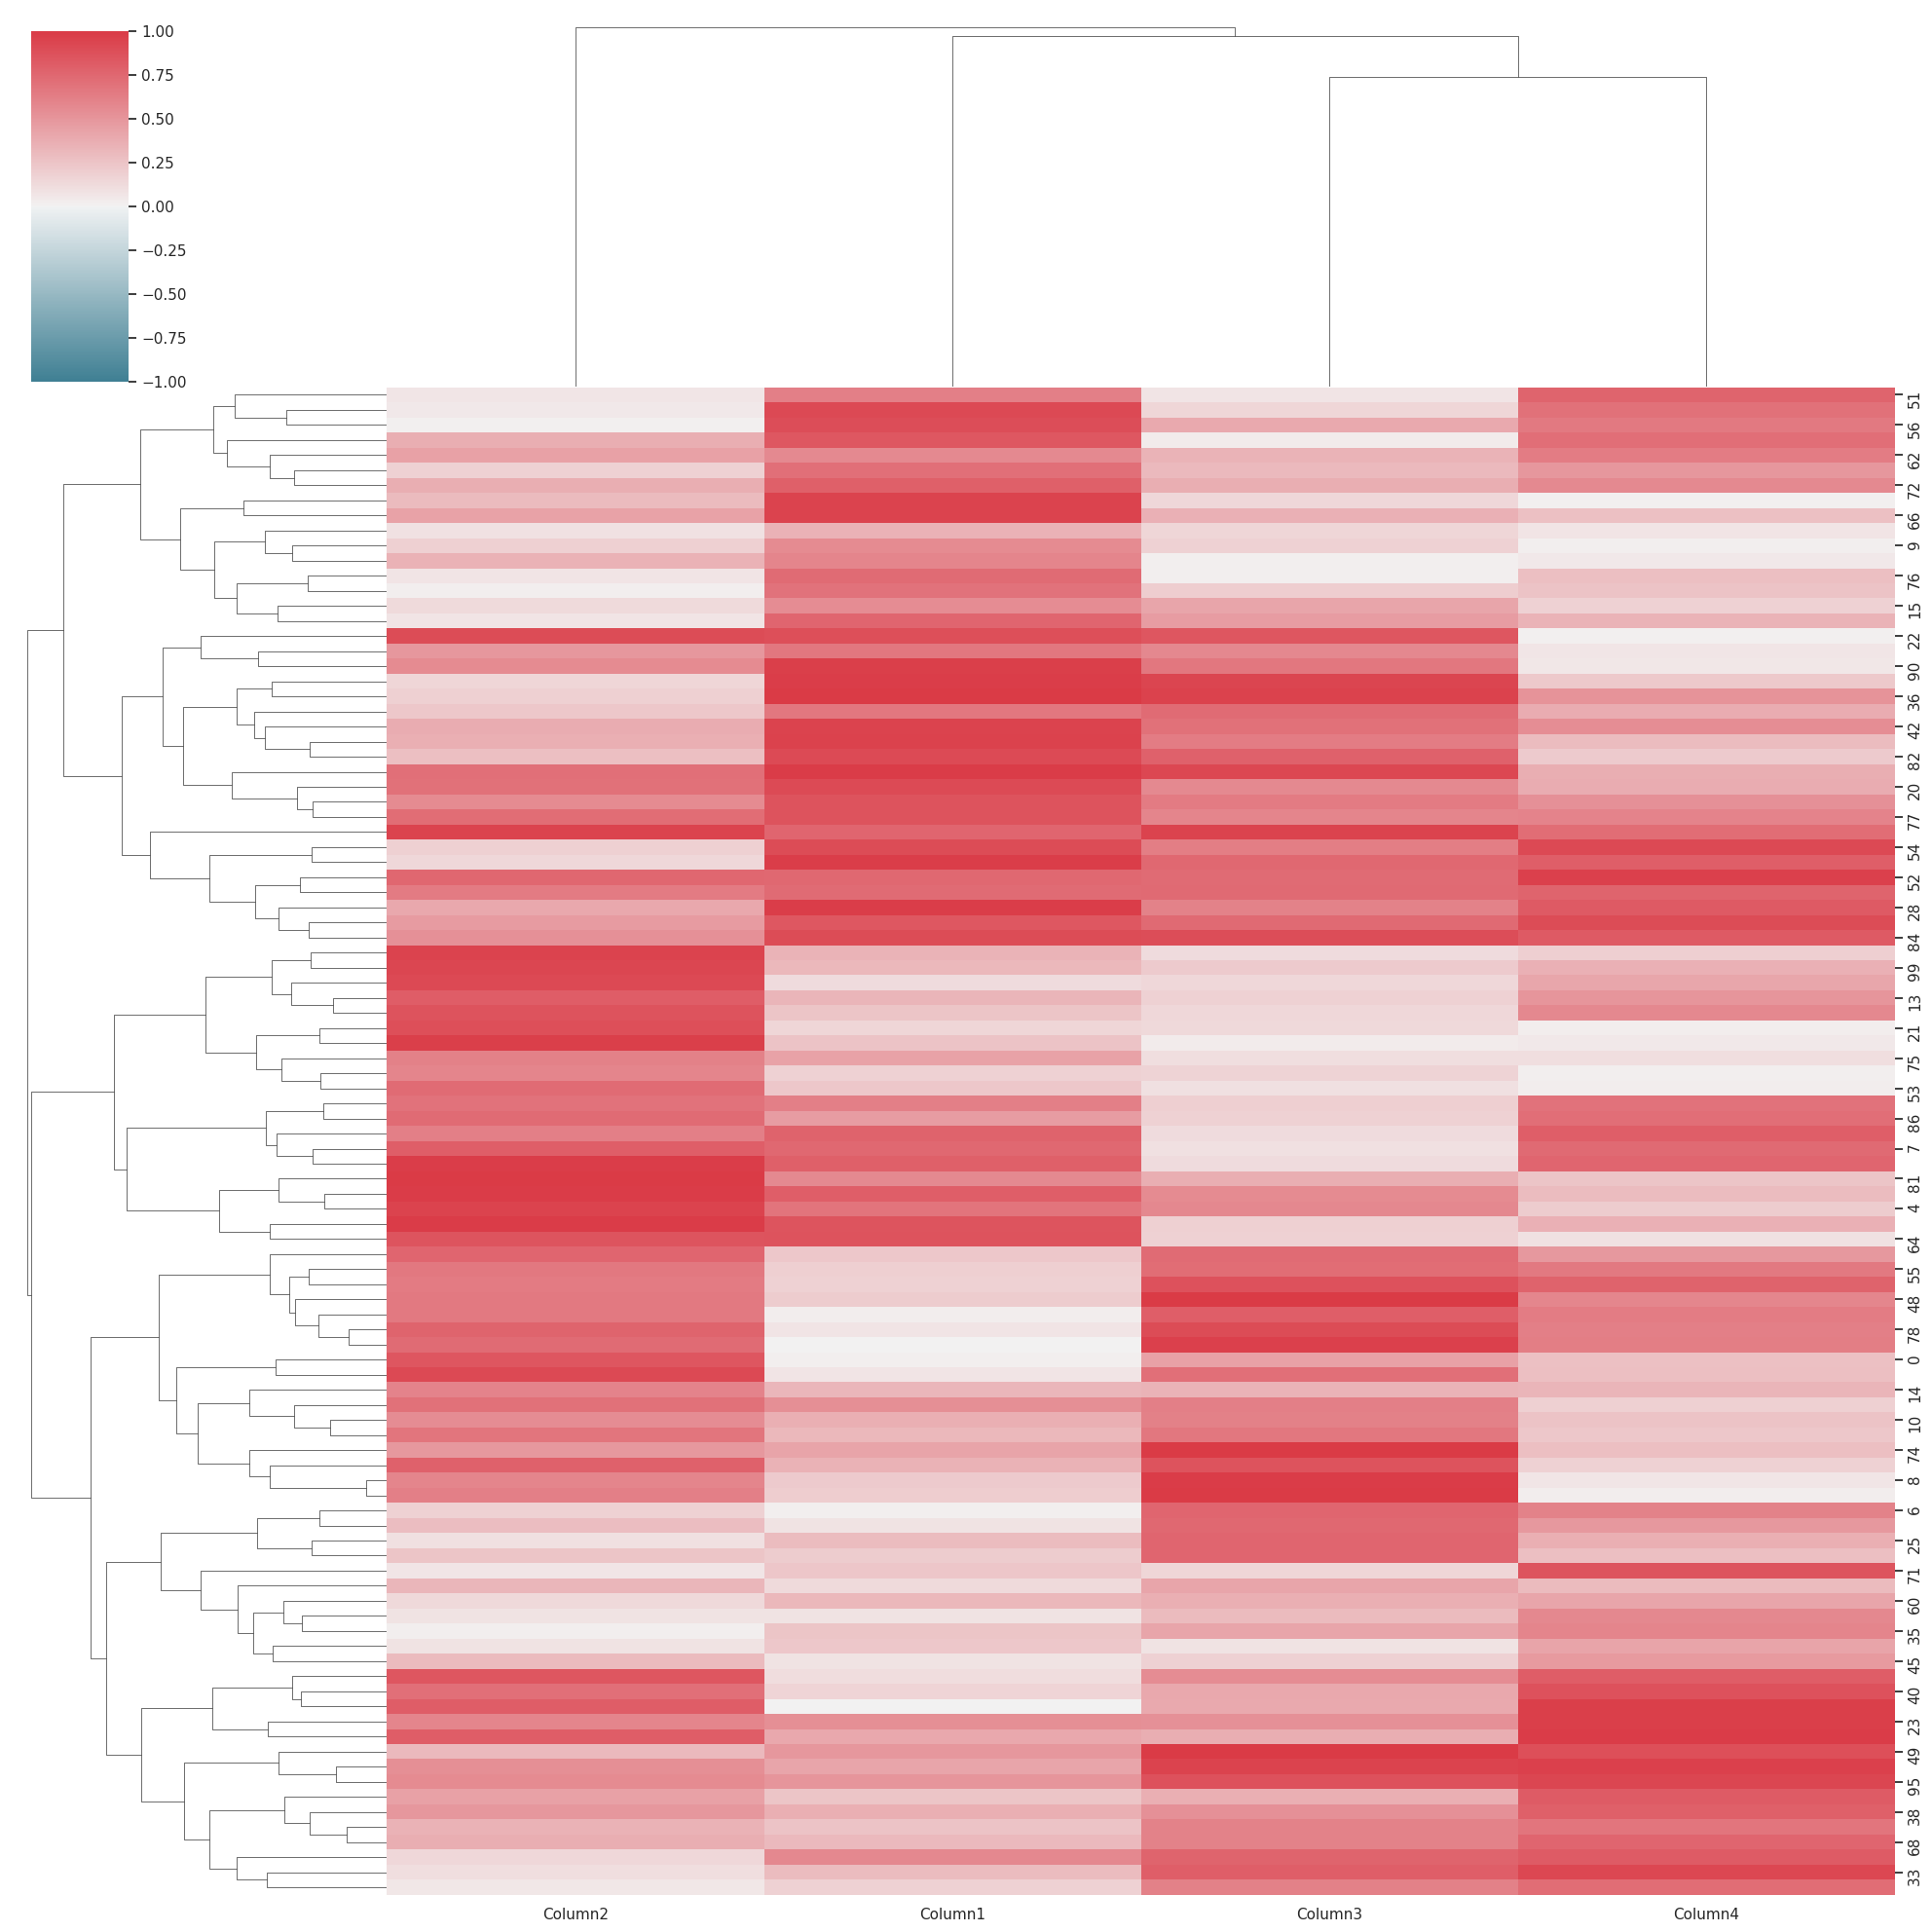

In [13]:
cplocorr.plot_heatmap(test_df, mode, figsize=config["figsize"])

## `plot_performance()`

In [14]:
evaluator, eval_config = cdmttme.get_example_model_evaluator()
plotter = dtfmomoplo.ModelPlotter(evaluator)
keys = None

Calculating positions:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating PnL:   0%|          | 0/8 [00:00<?, ?it/s]

INFO  memory_usage=rss=0.368GB vms=1.683GB mem_pct=5%
INFO  stats=
avg_turnover_(%)           140.416746
turnover_frequency      <BusinessDay>
avg_holding_period           0.712166
holding_period_units    <BusinessDay>
Name: positions, dtype: object
INFO  memory_usage=rss=0.375GB vms=1.690GB mem_pct=5%


/app/core/statistics/requires_statsmodels.py:183: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  ) = sm.tsa.stattools.kpss(data.values, regression=regression, nlags=nlags)


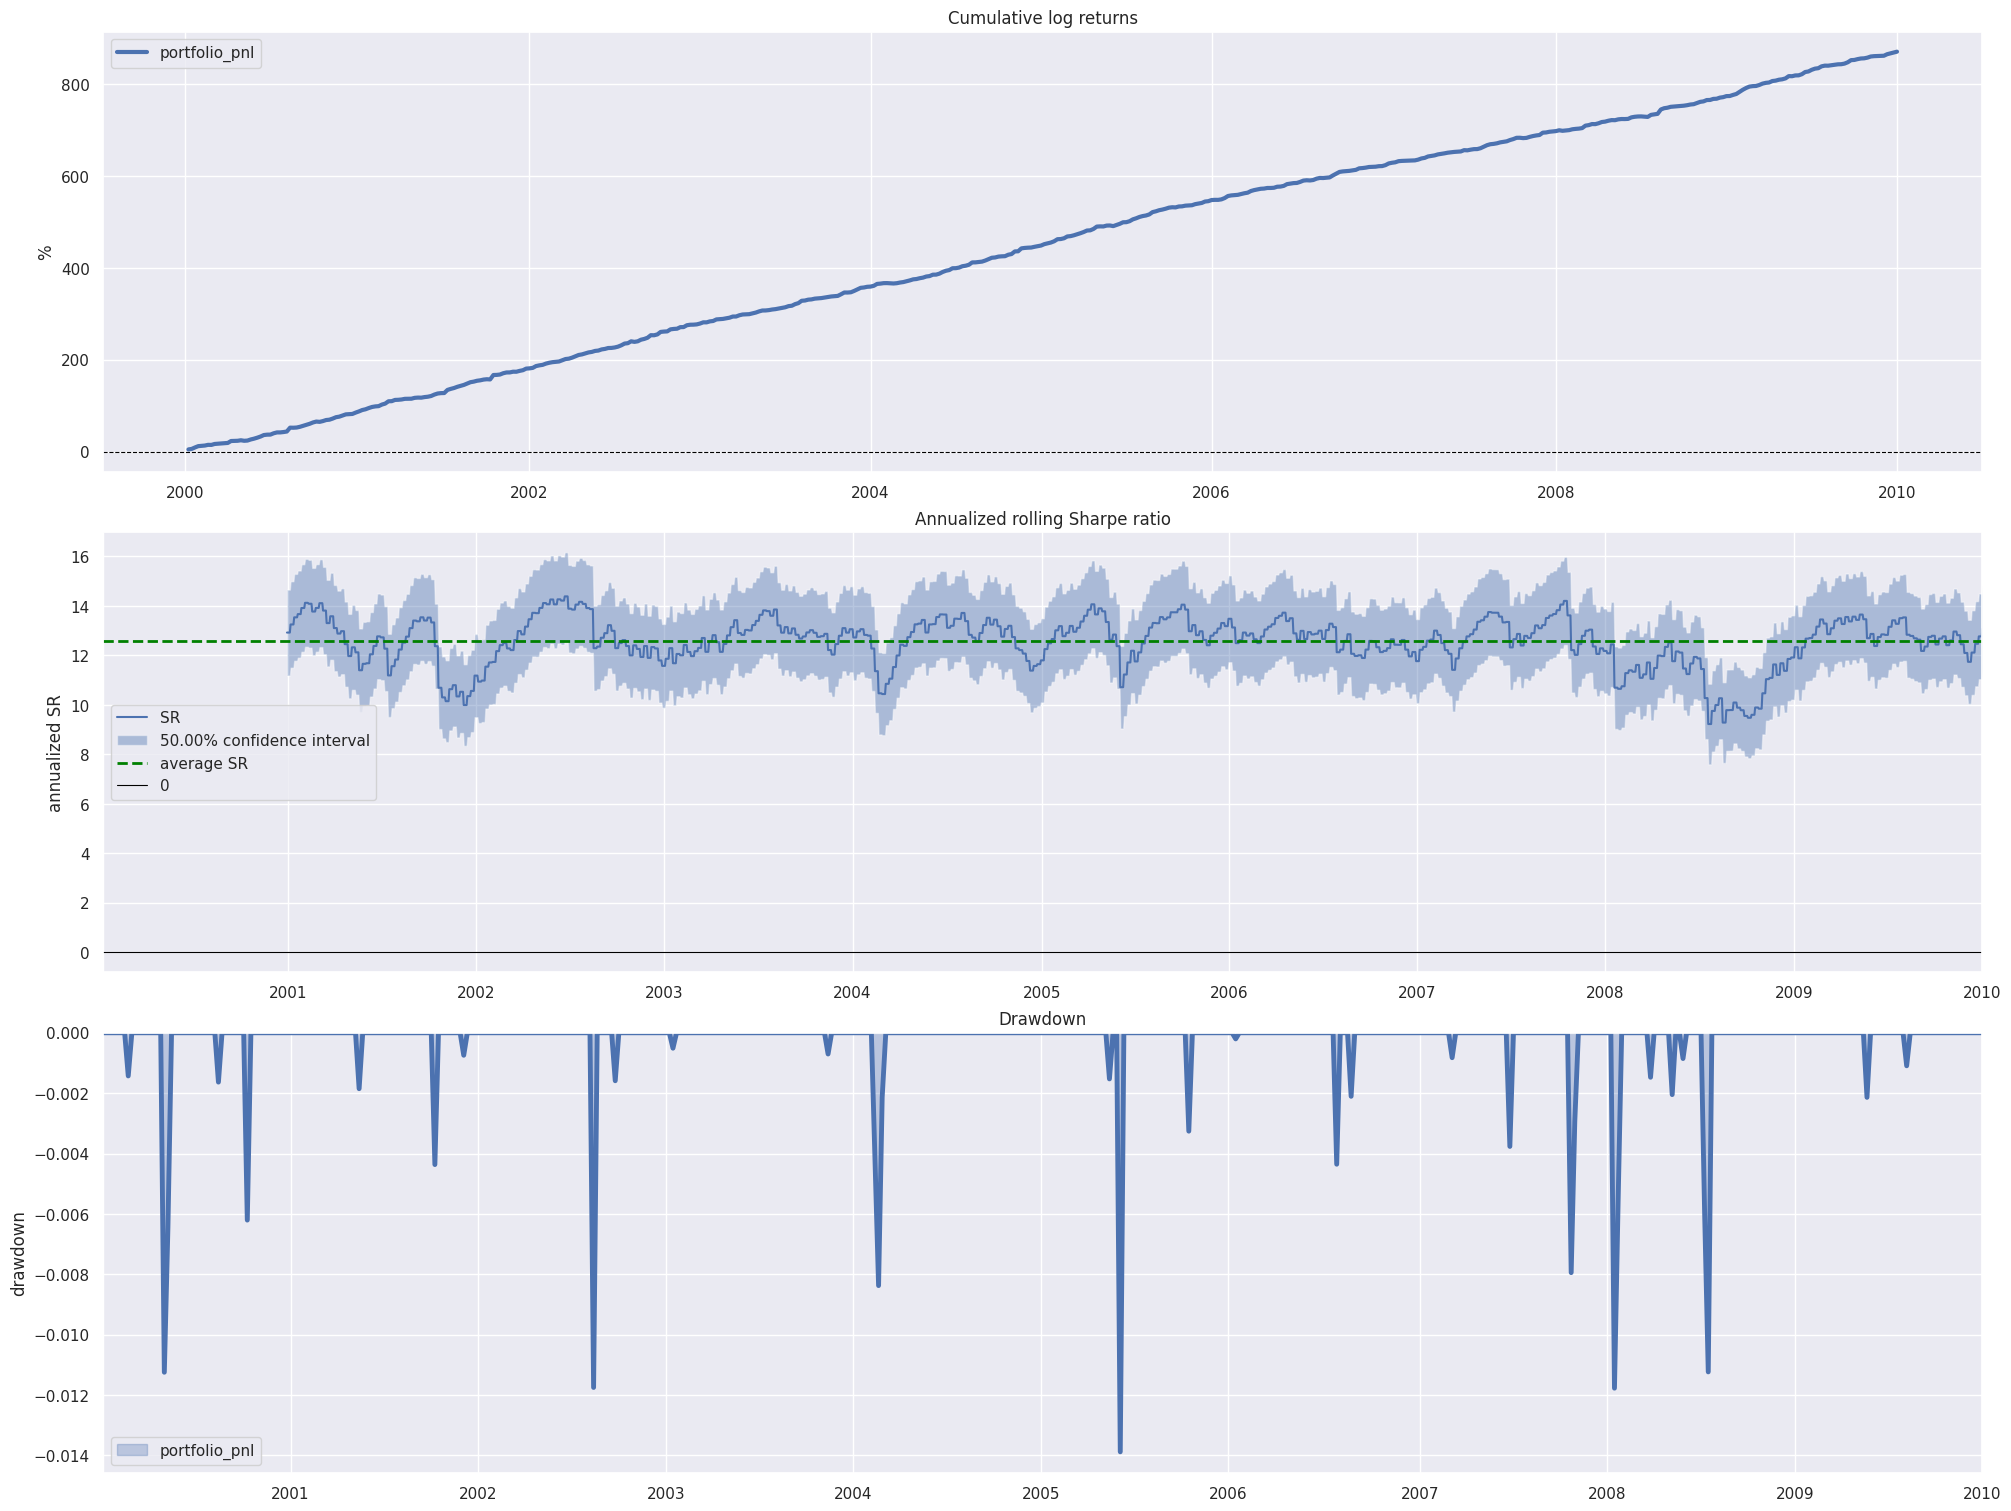

In [15]:
plotter.plot_performance(
    keys=keys,
    resample_rule=eval_config["resample_rule"],
    mode=eval_config["mode"],
    target_volatility=eval_config["target_volatility"],
)

## `plot_rets_signal_analysis()`

In [16]:
evaluator, eval_config = cdmttme.get_example_model_evaluator()
plotter = dtfmomoplo.ModelPlotter(evaluator)
keys = None

Calculating positions:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating PnL:   0%|          | 0/8 [00:00<?, ?it/s]

INFO  memory_usage=rss=0.378GB vms=1.693GB mem_pct=5%
INFO  stats=
avg_turnover_(%)           140.416746
turnover_frequency      <BusinessDay>
avg_holding_period           0.712166
holding_period_units    <BusinessDay>
Name: positions, dtype: object
INFO  memory_usage=rss=0.379GB vms=1.693GB mem_pct=5%


/app/core/statistics/requires_statsmodels.py:183: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  ) = sm.tsa.stattools.kpss(data.values, regression=regression, nlags=nlags)


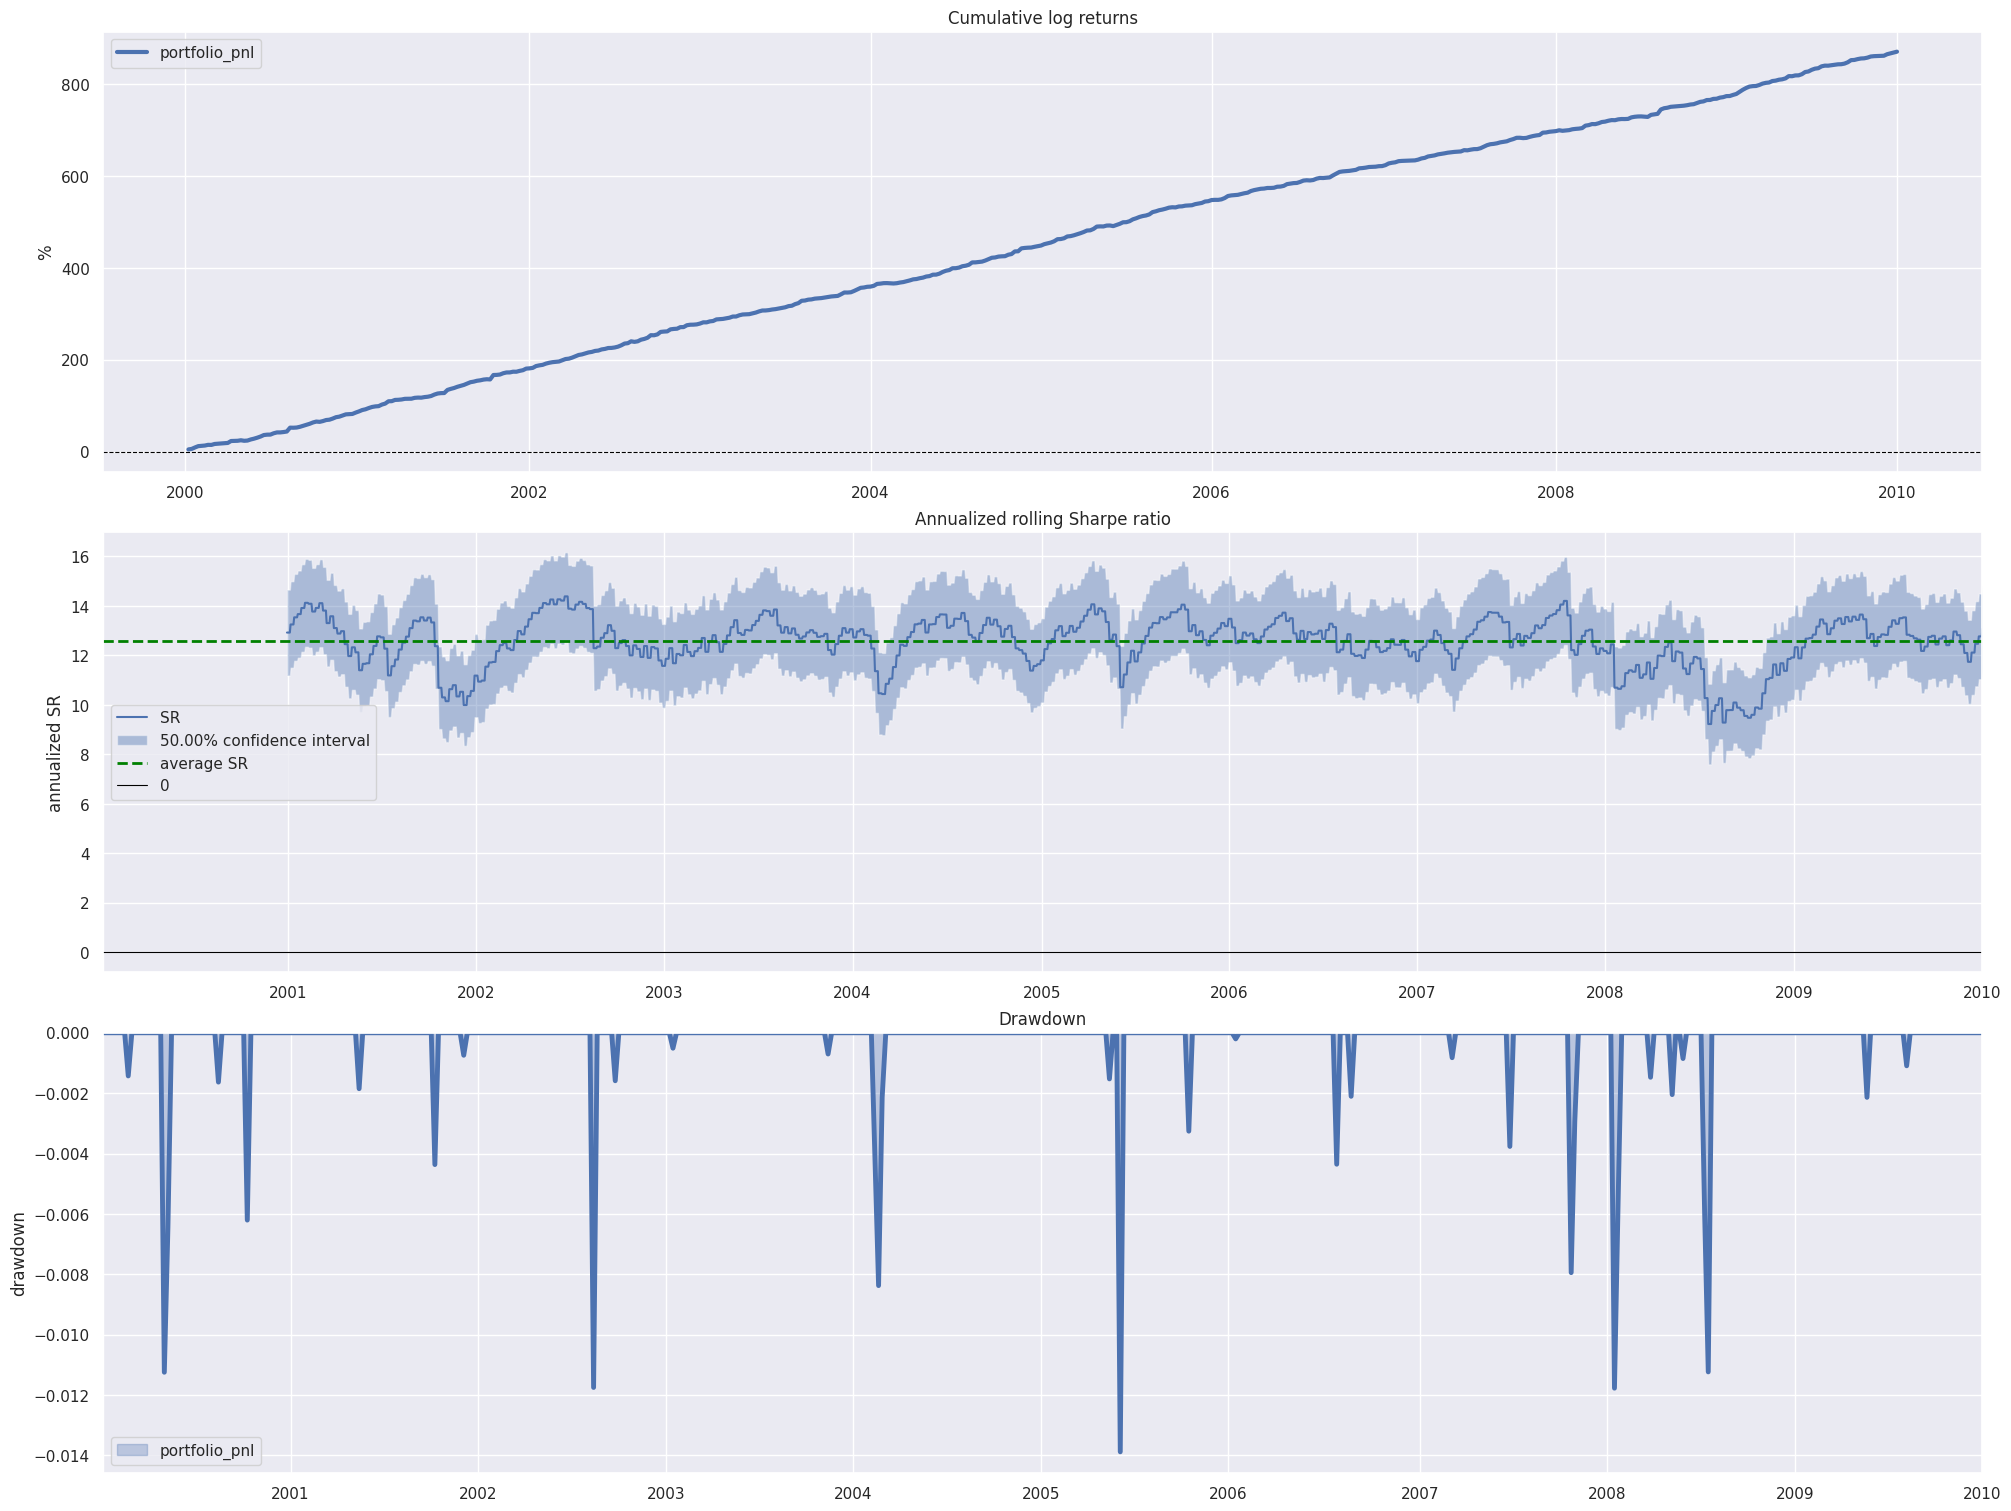

In [17]:
plotter.plot_performance(
    keys=keys,
    resample_rule=eval_config["resample_rule"],
    mode=eval_config["mode"],
    target_volatility=eval_config["target_volatility"],
)

## `plot_effective_correlation_rank()`

[3.9391591947124844, 3.88225992904209, 3.278717993581816]

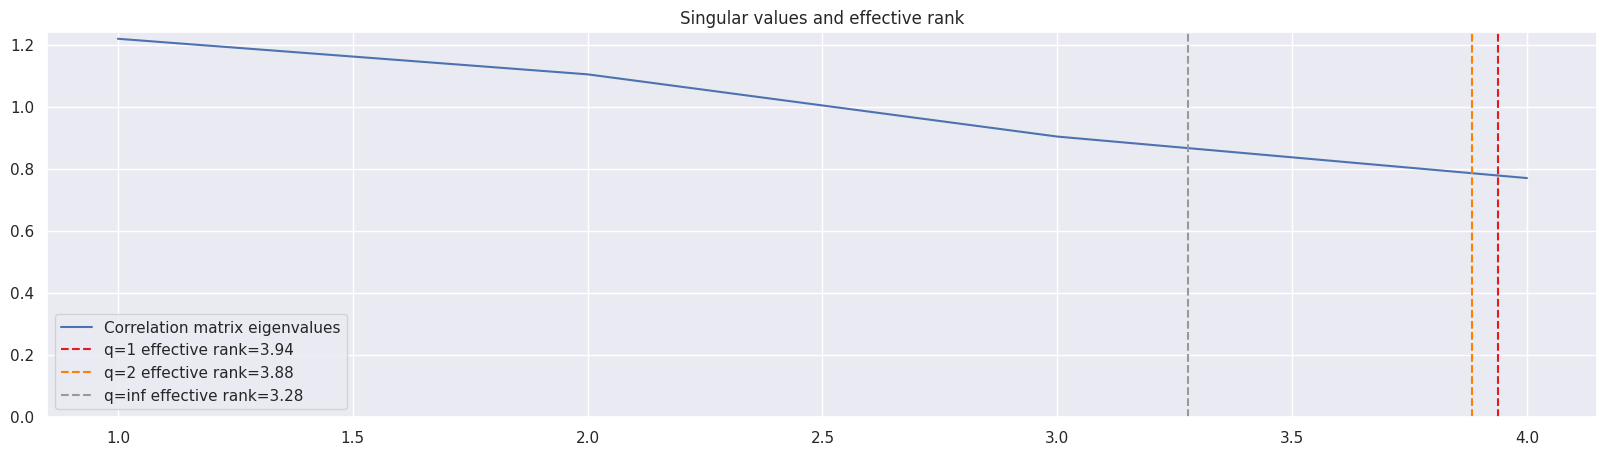

In [18]:
cplocorr.plot_effective_correlation_rank(test_df)

[3.877739967846579,
 3.6616597727352995,
 3.8049183255077943,
 3.755262584554235,
 3.9053912911615383]

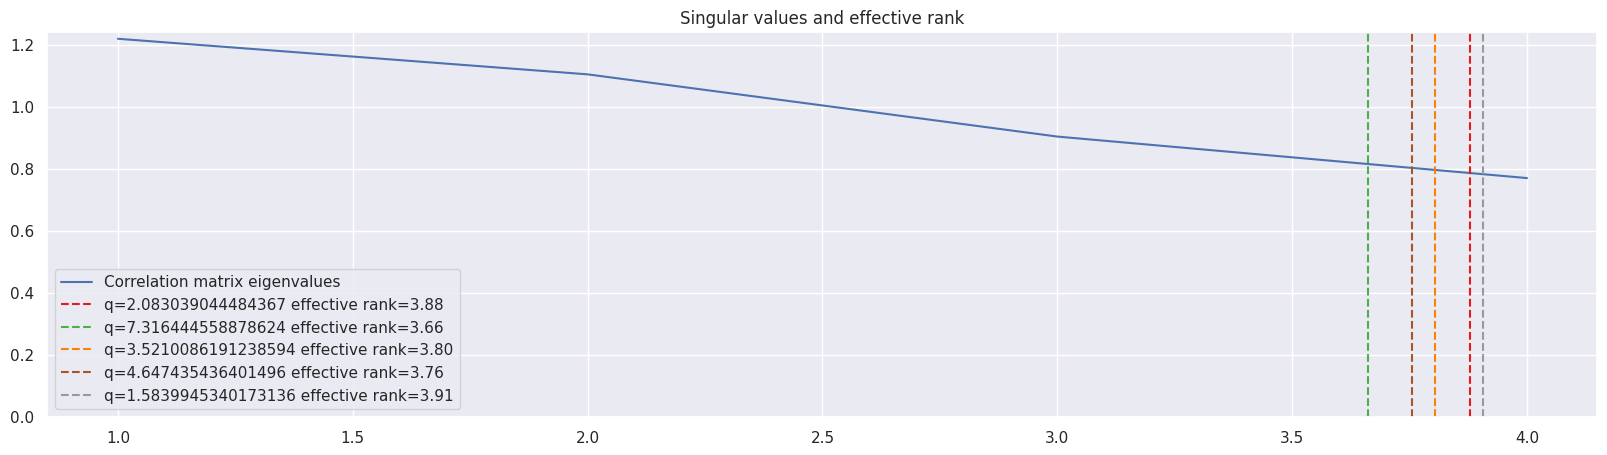

In [19]:
num_q_values = 5
q_values = np.random.uniform(1, 10, num_q_values).tolist()
cplocorr.plot_effective_correlation_rank(test_df, q_values)

## `plot_spectrum()`

/venv/lib/python3.9/site-packages/scipy/signal/_spectral_py.py:2014: UserWarning: nperseg = 256 is greater than input length  = 100, using nperseg = 100
  warnings.warn('nperseg = {0:d} is greater than input length '


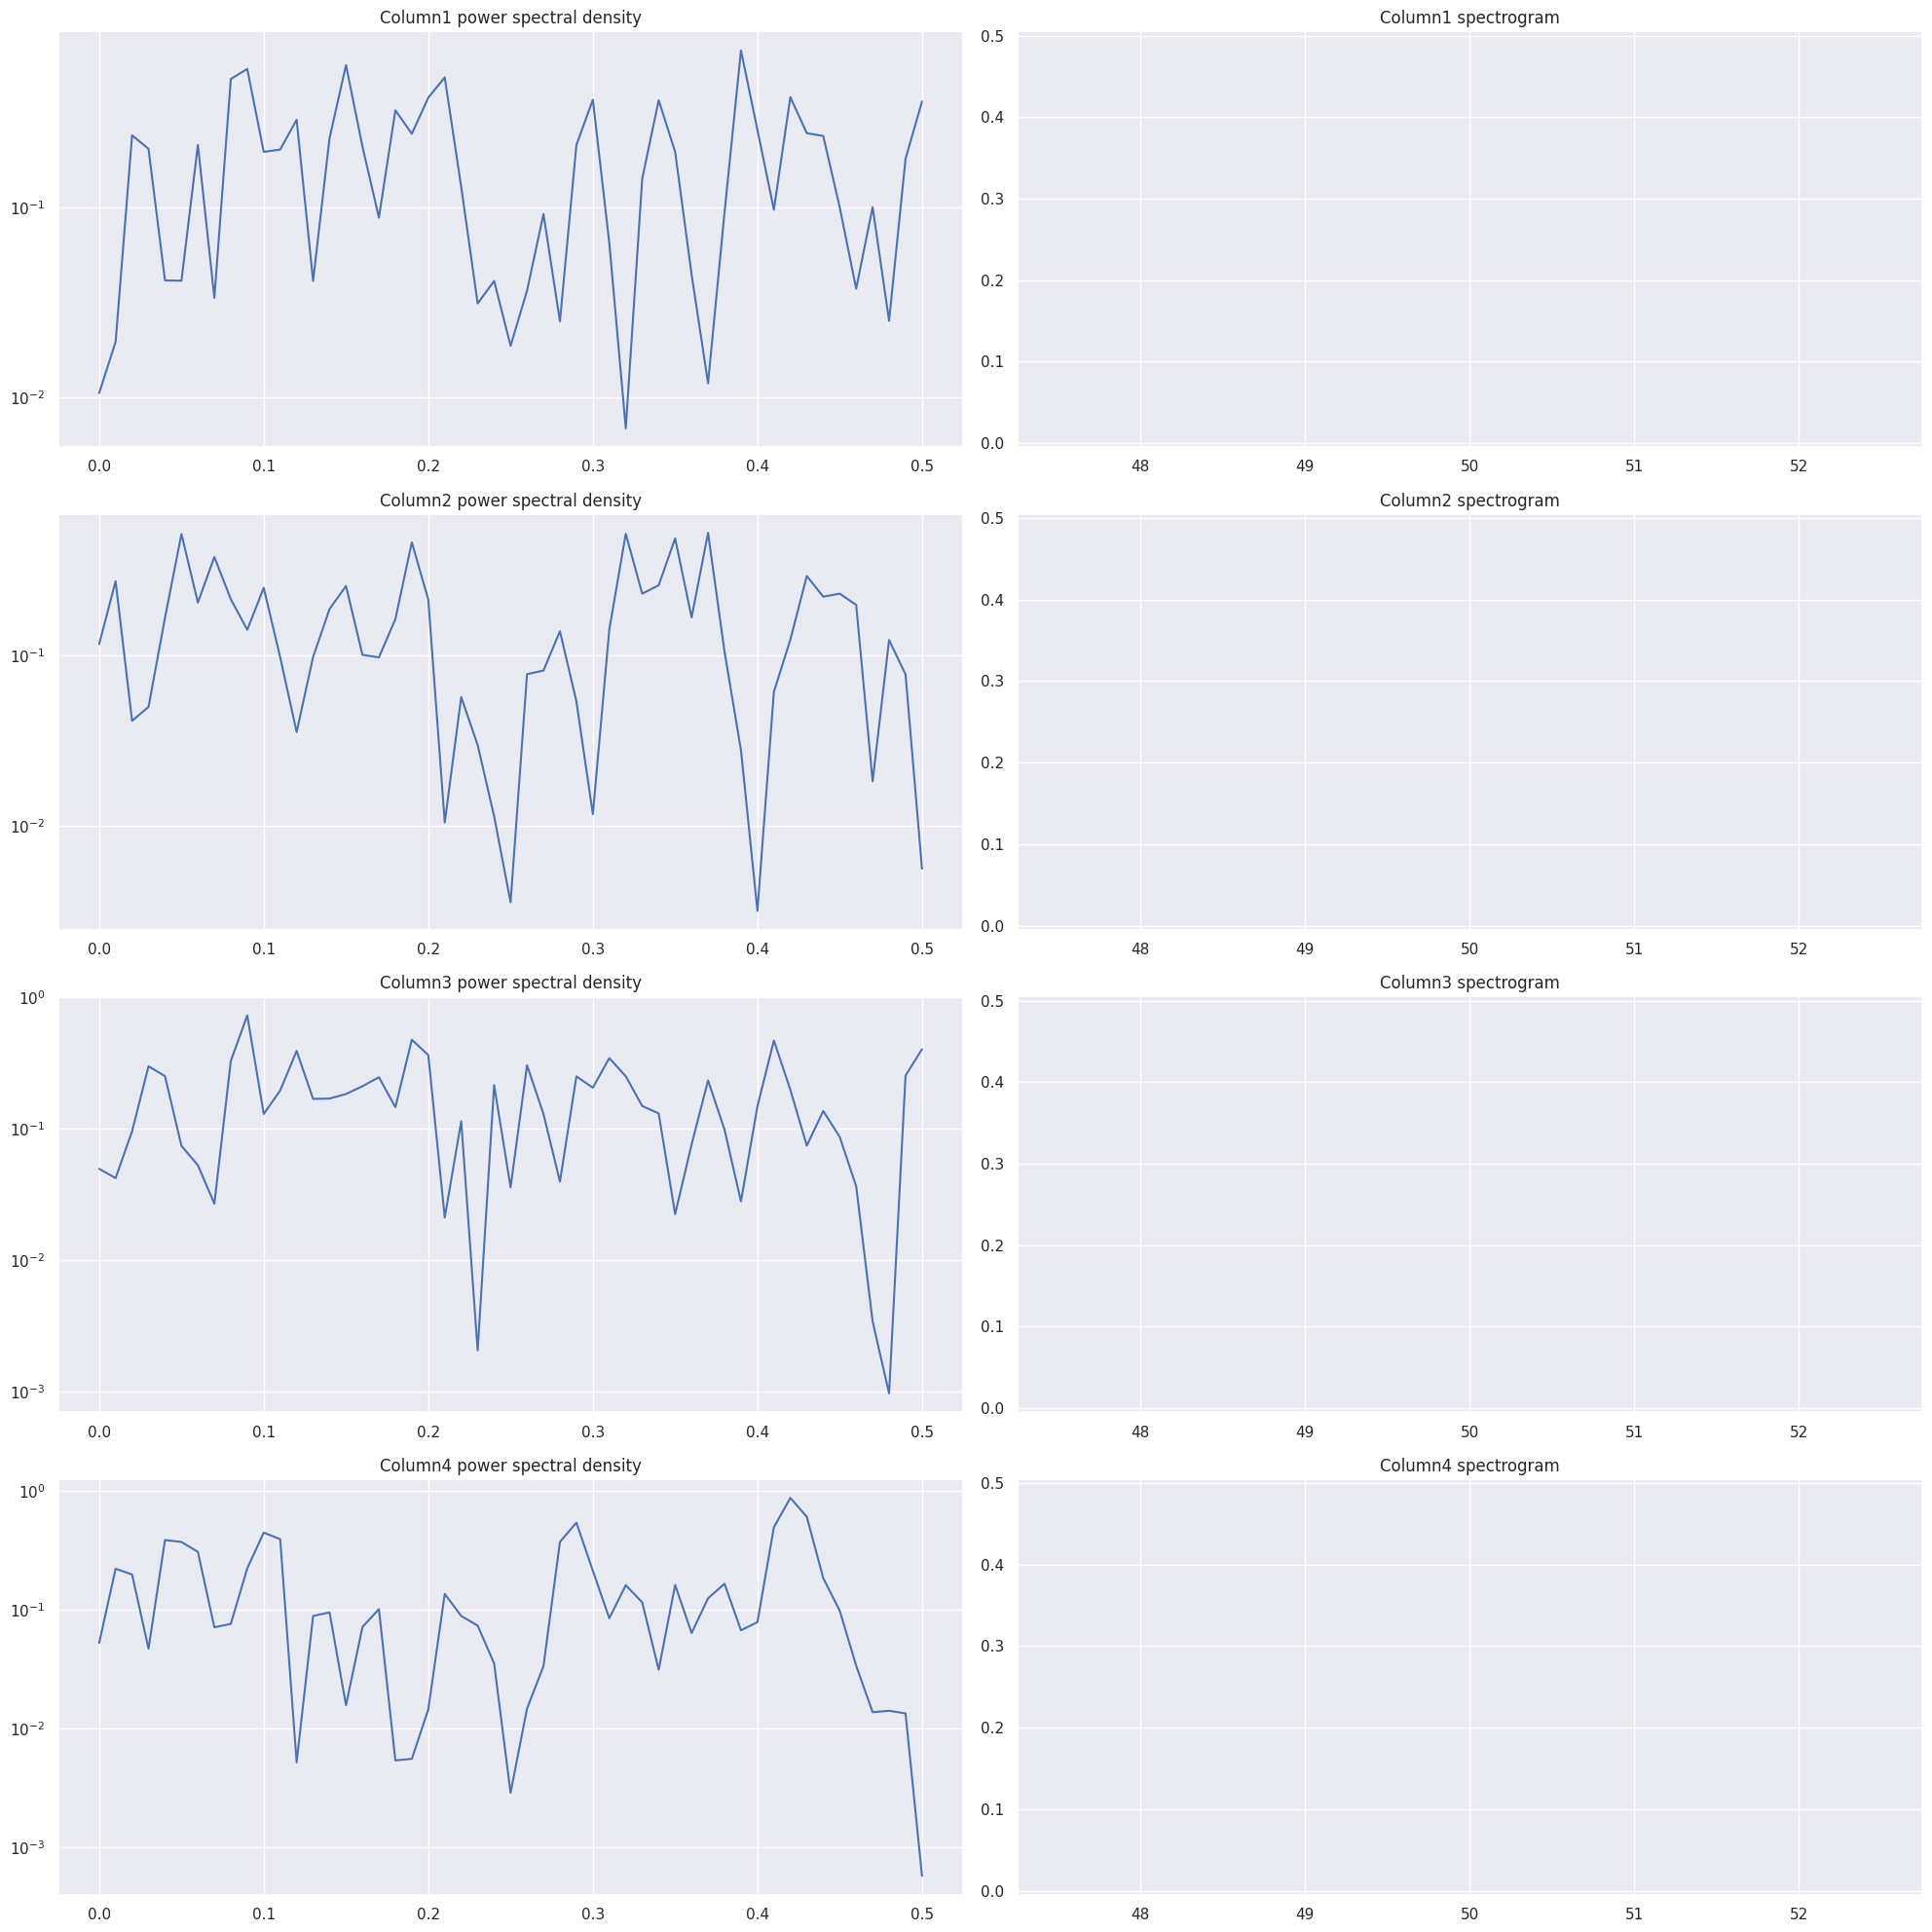

In [20]:
cplmiplo.plot_spectrum(test_df)

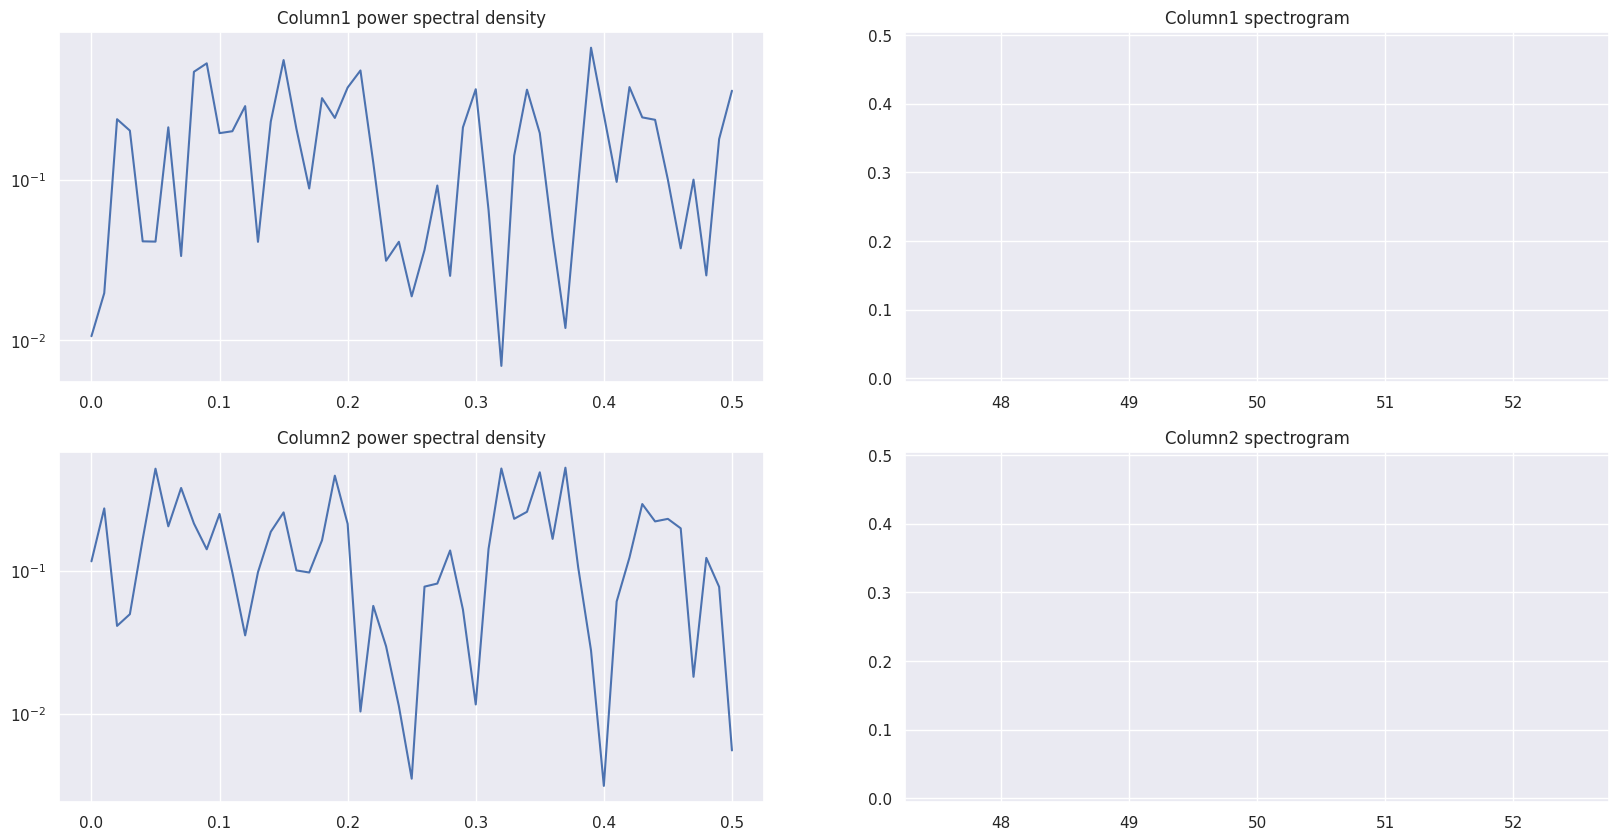

In [21]:
_, axes = plt.subplots(2, 2, figsize=config["figsize"])
axes_flat = axes.flatten()
cplmiplo.plot_spectrum(signal=test_df, axes=axes_flat)

# `plot_projection()`

In [22]:
df = cptetepl.Test_plots.get_plot_projection1()

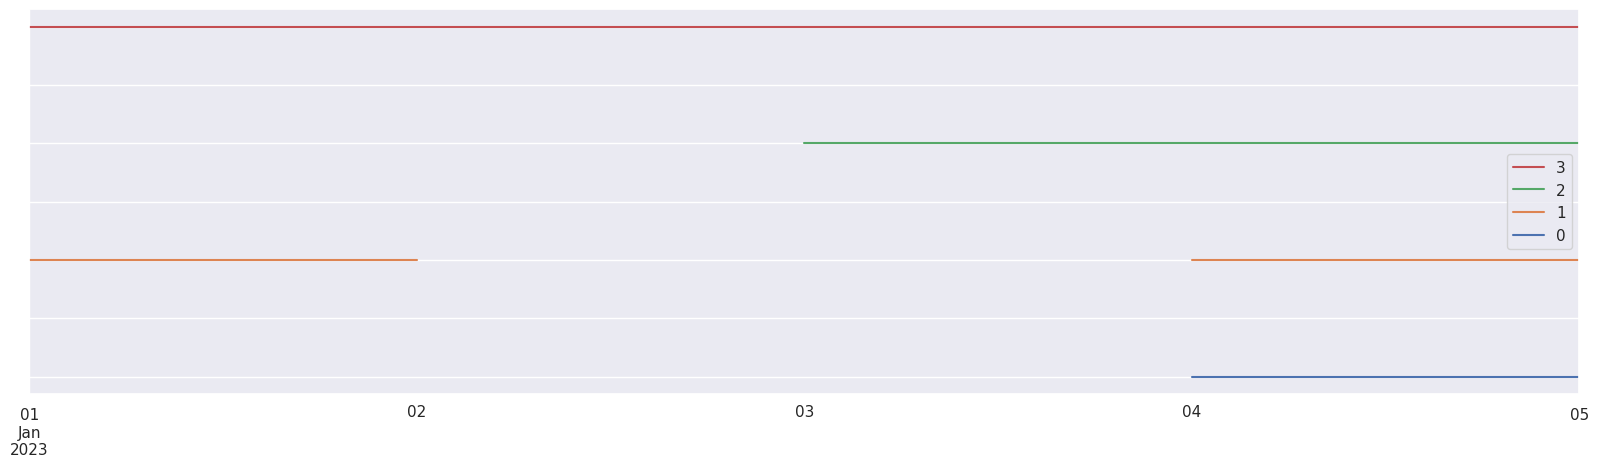

In [23]:
special_values = [0]
cplmiplo.plot_projection(df, special_values=special_values)

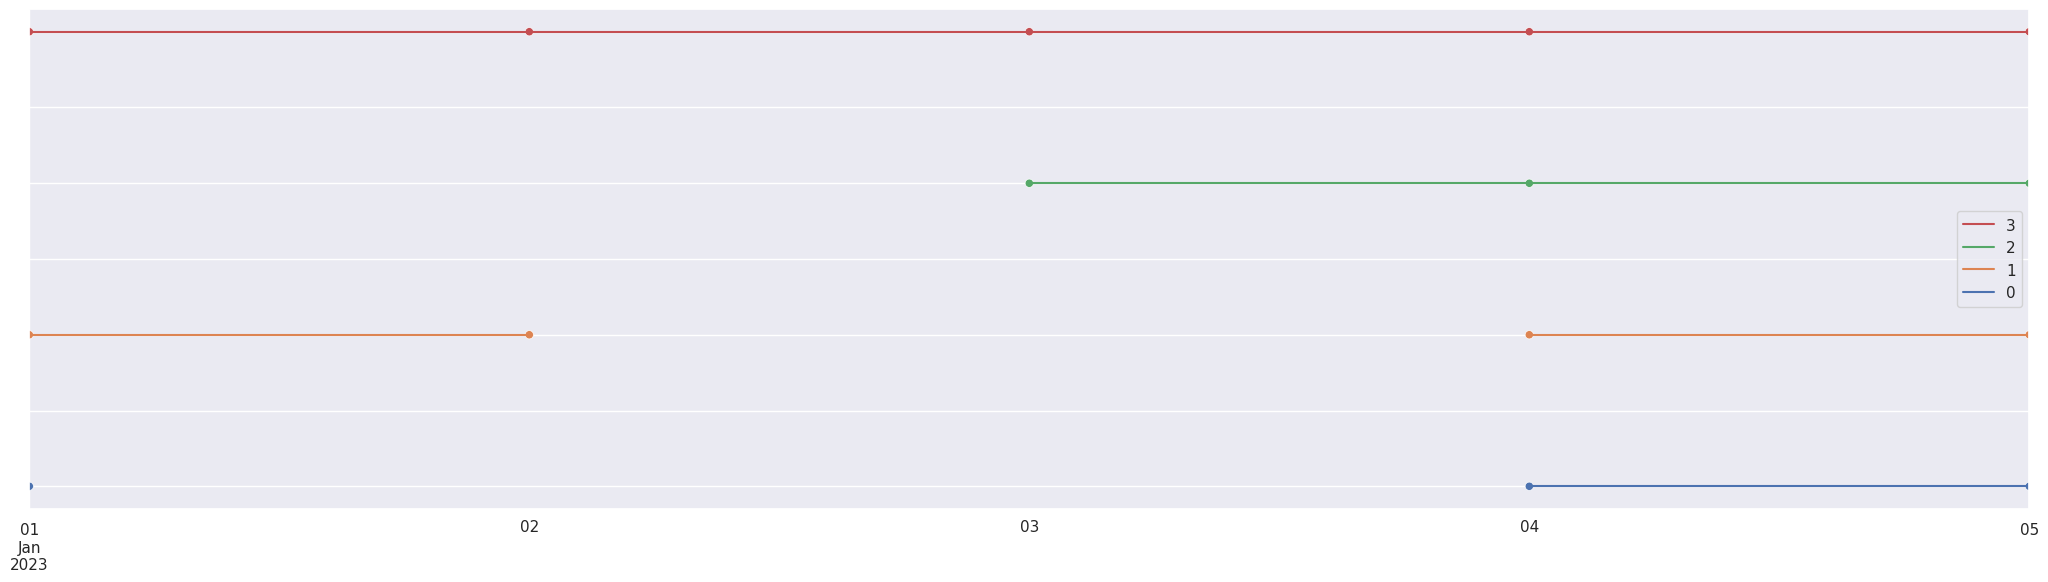

In [24]:
df = df.replace({0: None})
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
mode = "scatter"
cplmiplo.plot_projection(df, mode=mode, ax=ax)


# `plot_boxplot()`

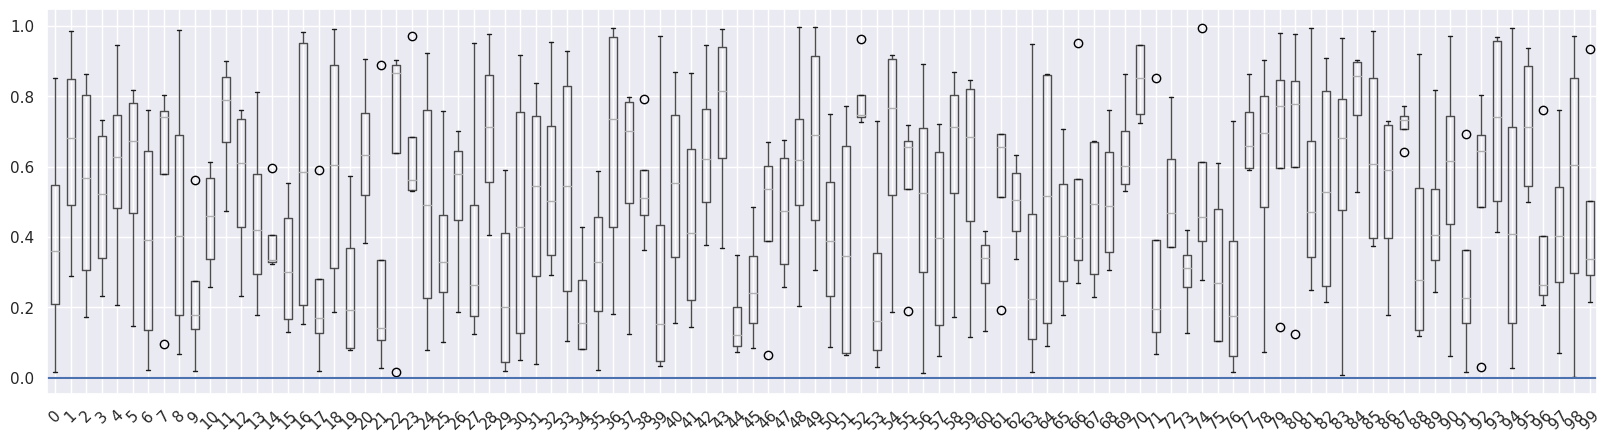

In [25]:
cploboxp.plot_boxplot(test_df)

In [26]:
grouping = "by_col"
ylabel = "Test Label"

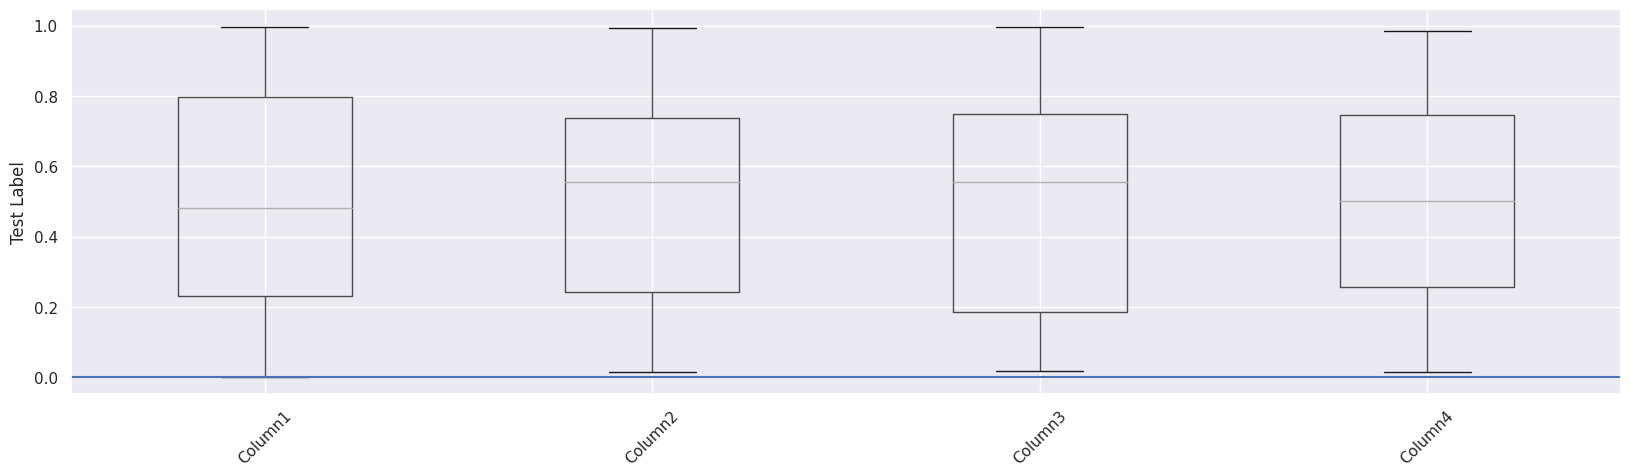

In [27]:
cploboxp.plot_boxplot(test_df, grouping=grouping, ylabel=ylabel)

## `plot_qq()`

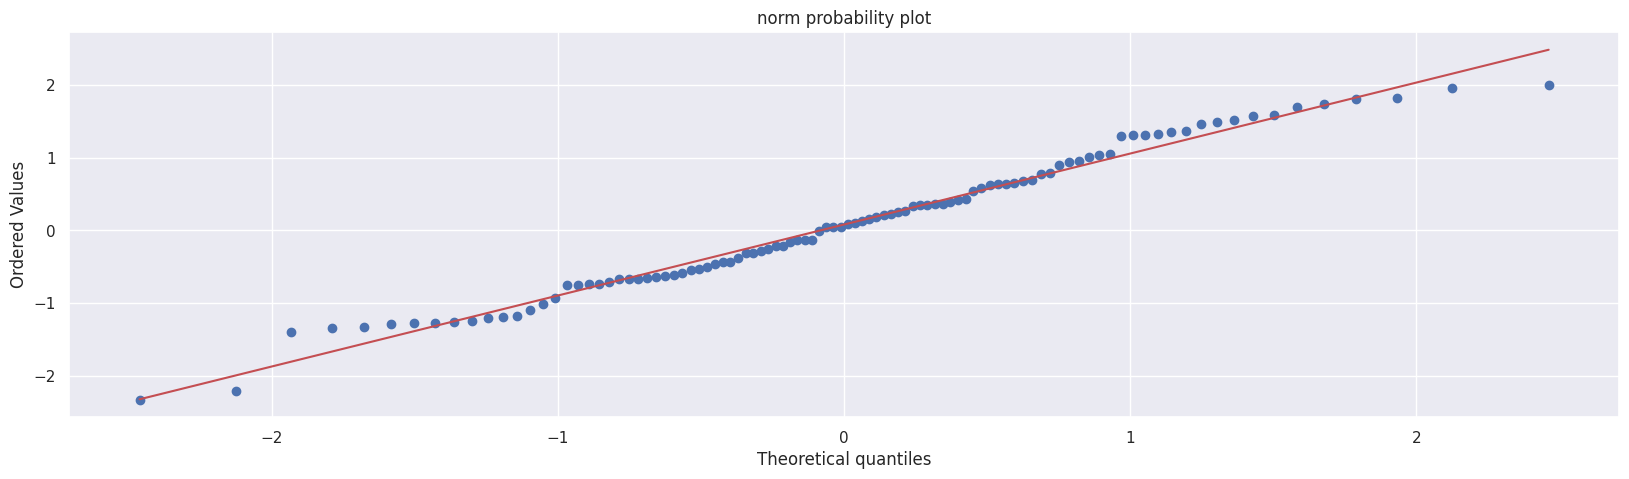

In [28]:
cplonorm.plot_qq(test_srs)

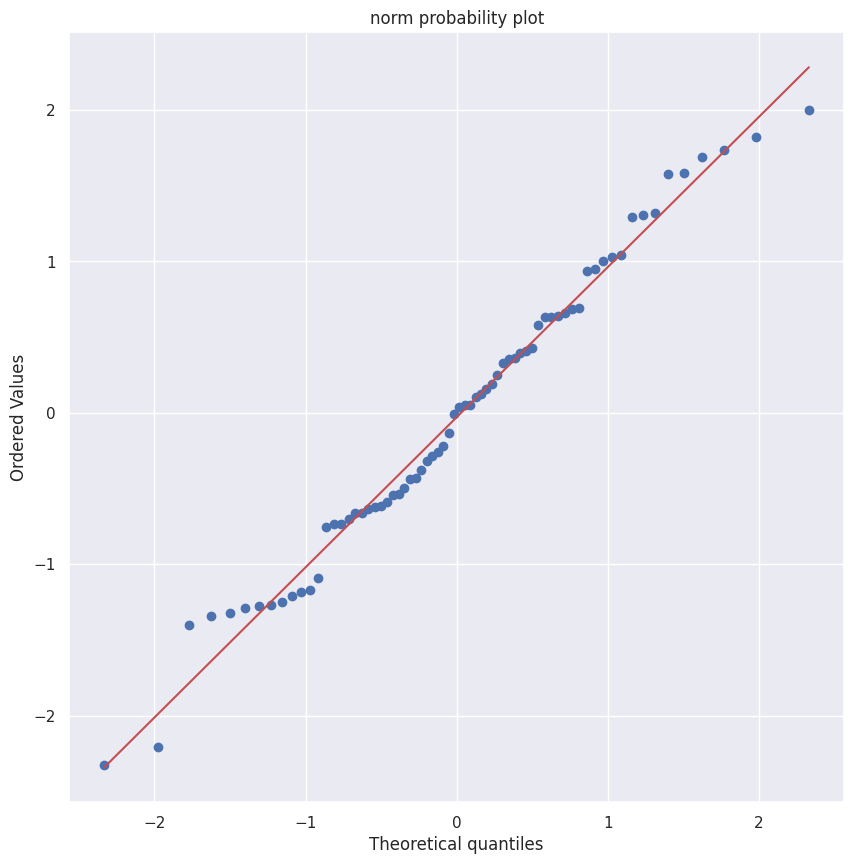

In [30]:
test_srs[20:50] = np.nan
_, axes = plt.subplots(1, 1, figsize=(10, 10))
cplonorm.plot_qq(test_srs, ax=axes, dist="norm", nan_mode="drop")